# Like Metro Bike Share EDA & Visualization

Imports

In [219]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np
from math import sin, cos, sqrt, atan2, radians
import matplotlib

Read the csv file

In [205]:
trips_df = pd.read_csv("Bike Share/2020-q1-cleaned.csv")
trips_df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,stop_time,hour,start_station_name,end_station_name
0,134867493,25,2020-01-01 00:16:00,1/1/2020 0:41,3063,34.048038,-118.253738,4491,34.047440,-118.247940,18419,30,One Way,Monthly Pass,electric,2020-01-01 00:41:00,0,Olive & 5th,Main & Winston
1,134867799,35,2020-01-01 00:24:00,1/1/2020 0:59,4285,NaN,NaN,4354,34.017681,-118.409081,15661,1,One Way,One Day Pass,smart,2020-01-01 00:59:00,0,Not Found,Venice & Glendon
2,134868104,37,2020-01-01 00:31:00,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,15848,1,One Way,Walk-up,smart,2020-01-01 01:08:00,0,Downtown Santa Monica Expo Line Station,Venice & Inglewood
3,134868103,36,2020-01-01 00:32:00,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,16053,1,One Way,Walk-up,smart,2020-01-01 01:08:00,0,Downtown Santa Monica Expo Line Station,Venice & Inglewood
4,134868102,35,2020-01-01 00:33:00,1/1/2020 1:08,4344,34.014309,-118.491341,4322,34.005871,-118.429161,15694,1,One Way,Walk-up,smart,2020-01-01 01:08:00,0,Downtown Santa Monica Expo Line Station,Venice & Inglewood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76386,140275195,65,2020-03-31 22:48:00,3/31/2020 23:53,4460,33.994850,-118.417961,4460,33.994850,-118.417961,15300,30,Round Trip,Monthly Pass,smart,2020-03-31 23:53:00,22,Culver & Inglewood,Culver & Inglewood
76387,140274593,23,2020-03-31 23:00:00,3/31/2020 23:23,3076,34.040600,-118.253838,3031,34.044701,-118.252441,16811,30,One Way,Monthly Pass,electric,2020-03-31 23:23:00,23,9th & Los Angeles,Not Found
76388,140274893,14,2020-03-31 23:23:00,3/31/2020 23:37,3031,34.044701,-118.252441,3076,34.040600,-118.253838,16811,30,One Way,Monthly Pass,electric,2020-03-31 23:37:00,23,Not Found,9th & Los Angeles
76389,140275293,21,2020-03-31 23:37:00,3/31/2020 23:58,3076,34.040600,-118.253838,3056,34.037460,-118.265381,16811,30,One Way,Monthly Pass,electric,2020-03-31 23:58:00,23,9th & Los Angeles,Grand & 14th


In [216]:
stations_df = pd.read_csv("Bike Share/Bike Stations.csv")

la_map_dark = folium.Map(location=[34.0522,-118.2437],
                        zoom_start=12,
                        tiles='CartoDB dark_matter')


locations = list(zip(stations_df['latitude'].values, stations_df['longitude'].values))
icons = [folium.Icon(icon="bicycle", prefix="fa") for _ in range(len(locations))]
popups = list(stations_df['Station_Name'].values)
cluster = MarkerCluster(locations = locations, icons = icons, popups = popups)
#folium.LayerControl().add_to(la_map_dark)
la_map_dark.add_child(cluster)
la_map_dark

,Station_ID,Station_Name,Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active
...,...,...,...,...,...
287,4498,Vineland & Oxnard,4/14/2020,North Hollywood,Active
288,4524,Wilshire & Normandie,4/17/2020,DTLA,Active
289,4523,Western & 3rd,4/22/2020,DTLA,Active
290,4502,North Hollywood Plaza,4/23/2020,North Hollywood,Active


## EDA

In [206]:
trips_df["duration"].describe()

count    76391.000000
mean        23.976607
std         92.979710
min          1.000000
25%          6.000000
50%         11.000000
75%         20.000000
max       1440.000000
Name: duration, dtype: float64

Here we describe the duration, arguably the most important attirubte.

The average ride is about 24 minutes. At least 75% of riders are riding at or under 20 minutes.

In [222]:
# R = 3963

# distance_df = pd.DataFrame(columns = ['distance'])
# distance_df

# for index, trip in trips_df.iterrows():
#     lat1 = radians(trip["start_lat"])
#     lon1 = radians(trip["start_lon"])
#     lat2 = radians(trip["end_lat"])
#     lon2 = radians(trip["end_lon"])

#     dlon = lon2 - lon1
#     dlat = lat2 - lat1

#     a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))

#     distance = R * c
    
#     new_item = {'distance' : distance}
    
#     distance_df = distance_df.append(new_item, ignore_index=True)

# distance_df

In [211]:
# Get names of indexes for which column Age has value 30
indexZero = distance_df[ distance_df['distance'] == 0 ].index
# Delete these row indexes from dataFrame
distance_df.drop(indexZero , inplace=True)

distance_df.drop
distance_df.describe()

,distance
count,2987.000000
mean,0.921320
std,0.717121
min,0.066352
25%,0.454978
50%,0.697991
75%,1.158022
max,5.723132


I drop distances that are 0 and describe the data.

Here I can see the average ride is about 0.87 miles and 75% of riders ride 1.1 miles or less.

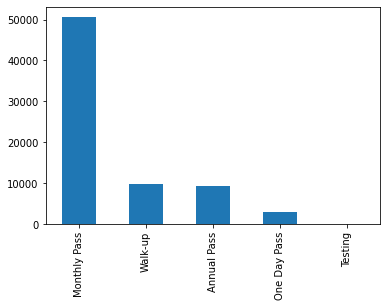

In [221]:
trips_df["passholder_type"].value_counts().plot.bar()

Monthly pass users clearly outnumber all other types of users.

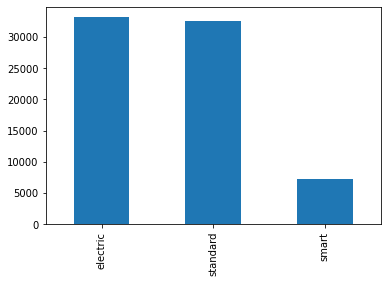

In [223]:
trips_df["bike_type"].value_counts().plot.bar()

Suprisingly, electric is the most popular type of bike

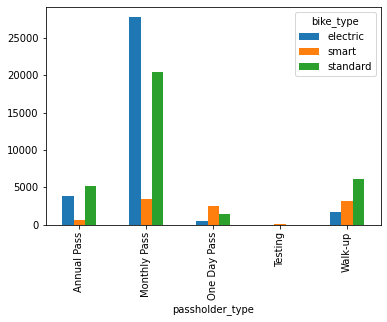

In [212]:
trips_df.groupby("passholder_type")["bike_type"].value_counts().unstack().plot.bar()

Monthly pass users rode electric bikes more often than others.

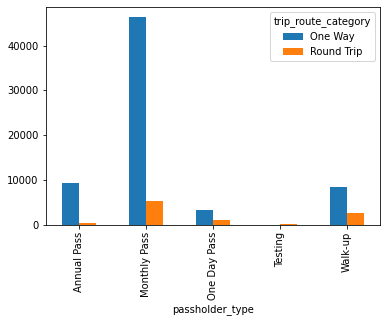

In [213]:
trips_df.groupby("passholder_type")["trip_route_category"].value_counts().unstack().plot.bar()

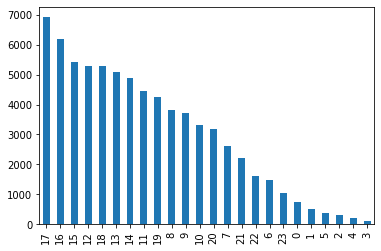

In [233]:
trips_df["hour"].value_counts().plot.bar()

5 o'clock is the busiest time

In [214]:
print(trips_df.isna().sum())
print(trips_df.dropna(inplace = True))
print(trips_df.isna().sum())

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat              1145
start_lon              1145
end_station               0
end_lat                2723
end_lon                2723
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
stop_time                 0
hour                      0
start_station_name        0
end_station_name          0
dtype: int64
None
trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
stop_time              0
hour                   0
start_station_name     0


## Visualizations
### Part 1

We will visualize the data and see what areas had more arrivals/departures within a specific hour

Grab data from a specifc time (in this case 6am)

In [224]:
def get_trip_counts_by_hour (selected_hour):
    # select the first occurrence of each station id
    locations = trips_df.groupby("start_station").first()
    # and select only the three columns we are interested in
    locations = locations.loc[:, ["start_lat",
                                  "start_lon",
                                  "start_station_name"]]

    subset = trips_df[trips_df["hour"]==selected_hour]
    departure_counts =  subset.groupby("start_station").count()
    # select one column
    departure_counts = departure_counts.iloc[:,[0]]
    # and rename that column
    departure_counts.columns= ["Departure Count"]

    arrival_counts =  subset.groupby("end_station").count().iloc[:,[0]]
    arrival_counts.columns= ["Arrival Count"]
    
    
    trip_counts = departure_counts.join(locations).join(arrival_counts)
    #Let's quickly remove any Nans
#     trip_counts.isna().sum()
#     trip_counts = trip_counts[trip_counts['start_lat'].notna()]
#     trip_counts = trip_counts[trip_counts['start_lon'].notna()]
    
    return trip_counts

#sample to check the function works
get_trip_counts_by_hour(6).head()

,Departure Count,start_lat,start_lon,start_station_name,Arrival Count
start_station,,,,,
3005,27,34.048500,-118.258537,7th & Flower,75.0
3006,2,34.045540,-118.256668,Olive & 8th,1.0
3007,3,34.050480,-118.254593,5th & Grand,29.0
3008,4,34.046612,-118.262733,Figueroa & 9th,8.0
3011,3,34.041130,-118.267982,Figueroa & Pico,4.0


This function creates a map and will plot the bike data to show departures/arrivals at a specific time
- Tangerine means there was more departures
- Teal means there was more arrivals

In [225]:
def plot_station_counts(trip_counts):
    #Create our map of LA
    arrival_departure_map = folium.Map(location=[34.0522,-118.2437],
                                       zoom_start=11,
                                       tiles='CartoDB dark_matter')
    #Add a circle marker for each row
    for index, row in trip_counts.iterrows():
            net_departures = (row["Departure Count"]-row["Arrival Count"])
        
            #Popup message for each circle
            popup_text = "{}<br> total departures: {}<br> total arrivals: {}<br> net departures: {}"
            popup_text = popup_text.format(row["start_station_name"],
                                           row["Arrival Count"],
                                           row["Departure Count"],
                                           net_departures)
            #radius of the circles
#             radius = np.abs(net_departures)
#             if np.isnan(radius):
#                 radius = 0
            radius = np.abs(net_departures) / 5
            
            if net_departures>0:
                color="#E80018" # target red
            else:
                color="#81D8D0" # tiffany blue
            
            #Adds the marker to the map
            folium.CircleMarker(location=(row["start_lat"],
                                          row["start_lon"]),
                                radius=radius,
                                color=color,
                                popup=popup_text,
                                fill = True).add_to(arrival_departure_map)
        
    return arrival_departure_map

Map at 7 am

In [226]:
trip_counts = get_trip_counts_by_hour(7)
plot_station_counts(trip_counts)

9am

In [227]:
trip_counts = get_trip_counts_by_hour(9)
plot_station_counts(trip_counts)

12pm

In [228]:
trip_counts = get_trip_counts_by_hour(12)
plot_station_counts(trip_counts)

6pm (leaving work)

In [229]:
trip_counts = get_trip_counts_by_hour(6)
plot_station_counts(trip_counts)

8pm

In [230]:
trip_counts = get_trip_counts_by_hour(8)
plot_station_counts(trip_counts)

# Part Two
Here I will connect the trips between the stations

In [235]:
from PIL import ImageDraw, Image
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap, rgb_to_hsv, hsv_to_rgb
import scipy.ndimage.filters

In [236]:
def add_lines(image_array, xys, width=1, weights=None):
    """
    Add a set of lines (xys) to an existing image_array
    width: width of lines
    weights: [], optional list of multipliers for lines. 
    """
    
    for i, xy in enumerate(xys):  # loop over lines
        # create a new gray scale image
        image = Image.new("L",(image_array.shape[1], image_array.shape[0]))
        
        # draw the line
        ImageDraw.Draw(image).line(xy, 200, width=width)
        
        #convert to array
        new_image_array = np.asarray(image, dtype=np.uint8).astype(float)
        
        # apply weights if provided
        if weights is not None:
            new_image_array *= weights[i]
            
        # add to existing array
        image_array += new_image_array

    # convolve image
    new_image_array = scipy.ndimage.filters.convolve(image_array, get_kernel(width*4)) 
    return new_image_array

In [237]:
def get_kernel(kernel_size, blur=1/20, halo=.001):
    """
    Create an (n*2+1)x(n*2+1) numpy array.
    Output can be used as the kernel for convolution.
    """
    
    # generate x and y grids
    x, y = np.mgrid[0:kernel_size*2+1, 0:kernel_size*2+1]
    
    center = kernel_size + 1  # center pixel
    r = np.sqrt((x - center)**2 + (y - center)**2)  # distance from center
    
    # now compute the kernel. This function is a bit arbitrary. 
    # adjust this to get the effect you want.
    kernel = np.exp(-r/kernel_size/blur) + (1 - r/r[center,0]).clip(0)*halo
    return kernel

In [238]:
def to_image(array, hue=.62):
    """converts an array of floats to an array of RGB values using a colormap"""
    
    # apply saturation function
    image_data = np.log(array + 1)
    
    # create colormap, change these values to adjust to look of your plot
    saturation_values = [[0, 0], [1, .68], [.78, .87], [0, 1]]
    colors = [hsv_to_rgb([hue, x, y]) for x, y in saturation_values]
    cmap = LinearSegmentedColormap.from_list("my_colormap", colors)
    
    # apply colormap
    out = cmap(image_data/image_data.max())
    
    # convert to 8-bit unsigned integer
    out = (out*255).astype(np.uint8)
    return out

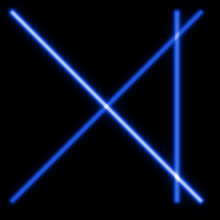

In [239]:
# generate some lines
xys = [(10,10,200,200), (175,10,175,200), (200,10,10,200)]  
weights = np.array([ 2,1,.7])/100  # some weights
# create the image_data
new_image_data = add_lines(np.zeros((220,220)),
                           xys,
                           width=4,
                           weights=weights)
# show the image
Image.fromarray(to_image(new_image_data),mode="RGBA")

In [240]:
min_lat = trips_df["start_lat"].min()
max_lat = trips_df["start_lat"].max()
max_lon = trips_df["start_lon"].max()
min_lon = trips_df["start_lon"].min()

def latlon_to_pixel(lat, lon, image_shape):
    # longitude to pixel conversion (fit data to image)
    delta_x = image_shape[1]/(max_lon-min_lon)
    
    # latitude to pixel conversion (maintain aspect ratio)
    delta_y = delta_x/np.cos(lat/360*np.pi*2)
    pixel_y = (max_lat-lat)*delta_y
    pixel_x = (lon-min_lon)*delta_x
    return (pixel_y,pixel_x)

In [241]:
def row_to_pixel(row,image_shape):
    """
    convert a row (1 trip) to pixel coordinates
    of start and end point
    """
    start_y, start_x = latlon_to_pixel(row["start_lat"], 
                                       row["start_lon"], image_shape)
    end_y, end_x = latlon_to_pixel(row["end_lat"], 
                                   row["end_lon"], image_shape)
    xy = (start_x, start_y, end_x, end_y)
    return xy

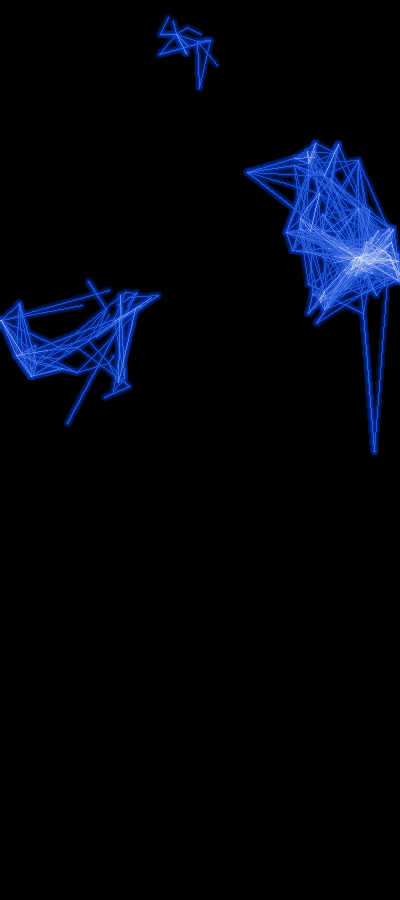

In [242]:
paths = trips_df[trips_df.hour==9]
paths = paths.iloc[:,:]
# generate empty pixel array, choose your resolution
image_data = np.zeros((900,400))
# generate pixel coordinates of starting points and end points
xys = [row_to_pixel(row, image_data.shape) for i, row in paths.iterrows()]
# draw the lines
image_data = add_lines(image_data, xys, weights=None, width = 1)
Image.fromarray(to_image(image_data*10)[:,:,:3],mode="RGB")

In [243]:
# make a list of locations (latitude longitude) for each station id
locations = trips_df.groupby("start_station").mean()
locations = locations.loc[:,["start_lat", "start_lon"]]

# group by each unique pair of (start-station, end-station) and count the number of trips
trips_df["path_id"] = [(id1,id2) for id1,id2 in zip(trips_df["start_station"], 
                                                     trips_df["end_station"])]
paths = trips_df[trips_df["hour"]==9].groupby("path_id").count().iloc[:,[1]] 
paths.columns = ["Trip Count"]

# select only paths with more than X trips
paths = paths[paths["Trip Count"]>5]
paths["start_station"] = paths.index.map(lambda x:x[0])
paths["end_station"] = paths.index.map(lambda x:x[1])
paths = paths[paths["start_station"]!=paths["end_station"]]

# join latitude/longitude into new table
paths = paths.join(locations,on="start_station")
locations.columns = ["end_lat","end_lon"]
paths = paths.join(locations,on="end_station")
paths.index = range(len(paths))

paths.shape

(101, 7)

In [244]:
def get_image_data(paths, min_count=0, max_count=None):
    # generate empty pixel array
    image_data = np.zeros((900*2,400*2))
    
    # generate pixel coordinates of starting points and end points
    if max_count is None:
        max_count = paths["Trip Count"].max()+1
    selector = (paths["Trip Count"]>= min_count) & (paths["Trip Count"]< max_count)
    xys = [row_to_pixel(row, image_data.shape) for i, row in paths[selector].iterrows()]

    # draw the lines
    image_data = add_lines(image_data, xys, weights=paths["Trip Count"], width = 1)
    return image_data

In [245]:
def add_alpha(image_data):
    """
    Uses the Value in HSV as an alpha channel. 
    This creates an image that blends nicely with a black background.
    """
    
    # get hsv image
    hsv = rgb_to_hsv(image_data[:,:,:3].astype(float)/255)
    
    # create new image and set alpha channel
    new_image_data = np.zeros(image_data.shape)
    new_image_data[:,:,3] = hsv[:,:,2]
    
    # set value of hsv image to either 0 or 1.
    hsv[:,:,2] = np.where(hsv[:,:,2]>0, 1, 0)
    
    # combine alpha and new rgb
    new_image_data[:,:,:3] = hsv_to_rgb(hsv)
    return new_image_data

In [246]:
# create the map
folium_map = folium.Map(location=[34.0522,-118.2437],
                        zoom_start=13,
                        tiles="CartoDB dark_matter",
                        width='100%')

# create the overlay
map_overlay = add_alpha(to_image(image_data*10))

# compute extent of image in lat/lon
aspect_ratio = map_overlay.shape[1]/map_overlay.shape[0]
delta_lat = (max_lon-min_lon)/aspect_ratio*np.cos(min_lat/360*2*np.pi)

# add the image to the map
img = folium.raster_layers.ImageOverlay(map_overlay,
                           bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                           opacity = 1,
                           name = "Paths")

img.add_to(folium_map)
folium.LayerControl().add_to(folium_map)

# show the map
folium_map

In [247]:
folium_map = folium.Map(location=[34.0522,-118.2437],
                        zoom_start=13,
                        tiles="CartoDB dark_matter",
                        width='50%')

thresholds = [5,15,25]

for i,t in enumerate(thresholds):
    upper = thresholds[i+1] if i<len(thresholds)-1 else None
    image_data = get_image_data(paths, t, upper)
    name = "{} < Num. Trips < {}".format(t,"max" if upper is None else upper)

    map_overlay = add_alpha(to_image(image_data*10))
    delta_lat = (max_lon-min_lon)/map_overlay.shape[1]*map_overlay.shape[0]*np.cos(min_lat/360*2*np.pi)
    img = folium.raster_layers.ImageOverlay(map_overlay,
                               bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                               name = name)

    img.add_to(folium_map)

lc = folium.LayerControl().add_to(folium_map)

folium_map